# 1.Результаты первичного анализа исходных данных

In [2]:
import pandas as pd
import pylab as pl
import seaborn as sns
from scipy import stats

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pd.set_option('precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(font_scale=1) # размер шрифта

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('bike-sharing-dataset.csv')

## 1.1. Количество записей и признаков

Получим информацию о таблице с данными.

In [4]:
data.head(10)

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   
5        6  2011-01-01       1   0     1   5        0        6           0   
6        7  2011-01-01       1   0     1   6        0        6           0   
7        8  2011-01-01       1   0     1   7        0        6           0   
8        9  2011-01-01       1   0     1   8        0        6           0   
9       10  2011-01-01       1   0     1   9        0        6           0   

   weathersit  temp  atemp   hum  windspeed  casual  registered  cnt  
0           1 0.240  0.288 0.810      0.000       3          13   16  
1           1 0.220  0.273 0.800      0.000       8          32   40  
2           1 0.220  0.273 0.800      0.000       5          27   32  
3           1 0.240  0.288 0.750      0.000       3          10   13  
4           1 0.240  0.288 0.750      0.000       0           1    1  
5           2 0.240  0.258 0.750      0.090       0           1    1  
6           1 0.220  0.273 0.800      0.000       2           0    2  
7           1 0.200  0.258 0.860      0.000       1           2    3  
8           1 0.240  0.288 0.750      0.000       1           7    8  
9           1 0.320  0.348 0.760      0.000       8           6   14

In [5]:
data[['season']]

season
0           1
1           1
2           1
3           1
4           1
5           1
6           1
7           1
8           1
9           1
10          1
11          1
12          1
13          1
14          1
15          1
16          1
17          1
18          1
19          1
20          1
21          1
22          1
23          1
24          1
25          1
26          1
27          1
28          1
29          1
...       ...
17349       1
17350       1
17351       1
17352       1
17353       1
17354       1
17355       1
17356       1
17357       1
17358       1
17359       1
17360       1
17361       1
17362       1
17363       1
17364       1
17365       1
17366       1
17367       1
17368       1
17369       1
17370       1
17371       1
17372       1
17373       1
17374       1
17375       1
17376       1
17377       1
17378       1

[17379 rows x 1 columns]

In [9]:
nrow = data.shape[0]
ncol = data.shape[1]
print ("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбцов (признаков).")

Итого: 17379 записи, 17 столбцов (признаков).


Перечень наименований столбцов таблицы:

In [10]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## 1.2. Смысловое описание признаков

Данные "Bike Sharing Dataset" содержат информацию об аренде велосипедов в г.Вашингтон(США) за 2011 и 2012 года. 
	- instant: индекс записи
	- dteday : дата аренды
	- season : сезон (1:весна, 2:лето, 3:осень, 4:зина)
	- yr : год (0: 2011, 1:2012)
	- mnth :месяц ( 1 - 12)
	- hr : час (0 - 23)
	- holiday : праздничный день (информация из http://dchr.dc.gov/page/holiday-schedule)
	- weekday : день недели
	- workingday : выходной день - 1, в остальных случаях - 0.
	+ weathersit : погода
		- 1: Ясно, Малоооблпачно
		- 2: туман, облачно
		- 3: Небольшой снег, слабый дождь
		- 4: Сильный дождь, снег, град, гроза, туман
	- temp : Нормализированная температура по Цельсию. Значения разделены на 41 (max)
	- atemp: Нормализированная температура по ощущениям по Цельсию. Значения разделены на 50 (max)
	- hum: Влажность. Значения до 100 (max)
	- windspeed: Скорость ветра. Значения до 67 (max)
	- casual: количество случайных клиентов
	- registered: количество постоянных клиентов
	- cnt: количество всех клиентов

In [11]:
data.describe() # описание для числовых значений

instant    season        yr      mnth        hr   holiday   weekday  \
count 17379.000 17379.000 17379.000 17379.000 17379.000 17379.000 17379.000   
mean   8690.000     2.502     0.503     6.538    11.547     0.029     3.004   
std    5017.029     1.107     0.500     3.439     6.914     0.167     2.006   
min       1.000     1.000     0.000     1.000     0.000     0.000     0.000   
25%    4345.500     2.000     0.000     4.000     6.000     0.000     1.000   
50%    8690.000     3.000     1.000     7.000    12.000     0.000     3.000   
75%   13034.500     3.000     1.000    10.000    18.000     0.000     5.000   
max   17379.000     4.000     1.000    12.000    23.000     1.000     6.000   

       workingday  weathersit      temp     atemp       hum  windspeed  \
count   17379.000   17379.000 17379.000 17379.000 17379.000  17379.000   
mean        0.683       1.425     0.497     0.476     0.627      0.190   
std         0.465       0.639     0.193     0.172     0.193      0.122   
min         0.000       1.000     0.020     0.000     0.000      0.000   
25%         0.000       1.000     0.340     0.333     0.480      0.104   
50%         1.000       1.000     0.500     0.485     0.630      0.194   
75%         1.000       2.000     0.660     0.621     0.780      0.254   
max         1.000       4.000     1.000     1.000     1.000      0.851   

         casual  registered       cnt  
count 17379.000   17379.000 17379.000  
mean     35.676     153.787   189.463  
std      49.305     151.357   181.388  
min       0.000       0.000     1.000  
25%       4.000      34.000    40.000  
50%      17.000     115.000   142.000  
75%      48.000     220.000   281.000  
max     367.000     886.000   977.000

## 1.3. Типы данных столбцов и информация о пропусках

Таблица содержит данные следующих типов:

In [12]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Проверка наличия пропусков в таблице:

In [13]:
data.isnull().sum() 

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Т. к. количество нулевых значений для каждого признака таблицы равно нулю, делаем вывод, что пропусков нет.

## 1.4. Результат замены категориальных или ранговых данных на числовые

По причине отсутствия категориальных и ранговых данных в таблице, замена на числовые данные не требуется.

## 1.5. Результат обработки пропущенных значений

Т. к. пропусков нет, обработка пропущенных значений не требуется.

# 2. Обоснование выбора целевой переменной и признаков для анализа 

## 2.1. Перечень вариантов целевых переменных, исходя из п. 1.2.

В качестве целевой переменной моежет быть выбрано количество клиентов(cnt).

## 2.2. Матрица коэффициентов корреляции

In [16]:
corrdf = data.corr(method='pearson') # method= {‘pearson’, ‘kendall’, ‘spearman’} или функция
print (corrdf)

            instant  season     yr   mnth     hr  holiday  weekday  \
instant       1.000   0.404  0.866  0.489 -0.005    0.015    0.001   
season        0.404   1.000 -0.011  0.830 -0.006   -0.010   -0.002   
yr            0.866  -0.011  1.000 -0.010 -0.004    0.007   -0.004   
mnth          0.489   0.830 -0.010  1.000 -0.006    0.018    0.010   
hr           -0.005  -0.006 -0.004 -0.006  1.000    0.000   -0.003   
holiday       0.015  -0.010  0.007  0.018  0.000    1.000   -0.102   
weekday       0.001  -0.002 -0.004  0.010 -0.003   -0.102    1.000   
workingday   -0.003   0.014 -0.002 -0.003  0.002   -0.252    0.036   
weathersit   -0.014  -0.015 -0.019  0.005 -0.020   -0.017    0.003   
temp          0.136   0.312  0.041  0.202  0.138   -0.027   -0.002   
atemp         0.138   0.319  0.039  0.208  0.134   -0.031   -0.009   
hum           0.010   0.151 -0.084  0.164 -0.276   -0.011   -0.037   
windspeed    -0.075  -0.150 -0.009 -0.135  0.137    0.004    0.012   
casual        0.158 

## 2.3. Матрица смежности (графический вариант интерпретации взаимосвязей переменных)

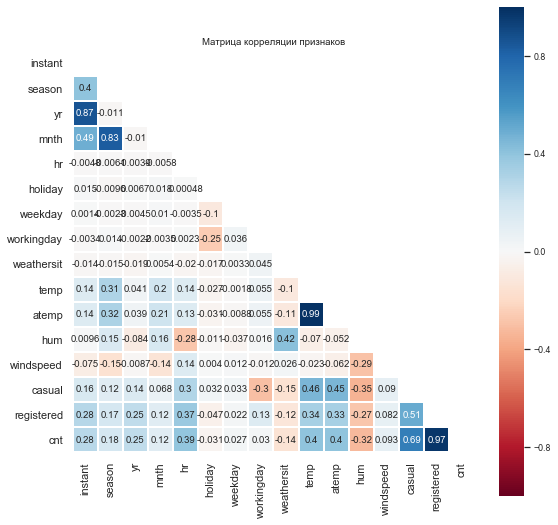

In [17]:
import matplotlib.pyplot as plt
##cmap = sns.diverging_palette(220, 10, as_cmap=True) ## сгенерировать цветовую карту
sns.set(style="white")# цвет фона

# построить "маску" для отображения только половины корреляционной матрицы
mask = np.zeros_like(corrdf, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(9,9))
sns.set(font_scale=0.8) # размер шрифта

# Построить тепловую карту
sns.heatmap(data=corrdf, vmin=-1, vmax=1, center=0,
            annot=True, 
            cmap = 'RdBu',
            mask=mask,   # применить маску
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
            #cbar_kws={"shrink": .5}  # уменьшить размер легенды
           )
plt.title(u'Матрица корреляции признаков');
# cmap = https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

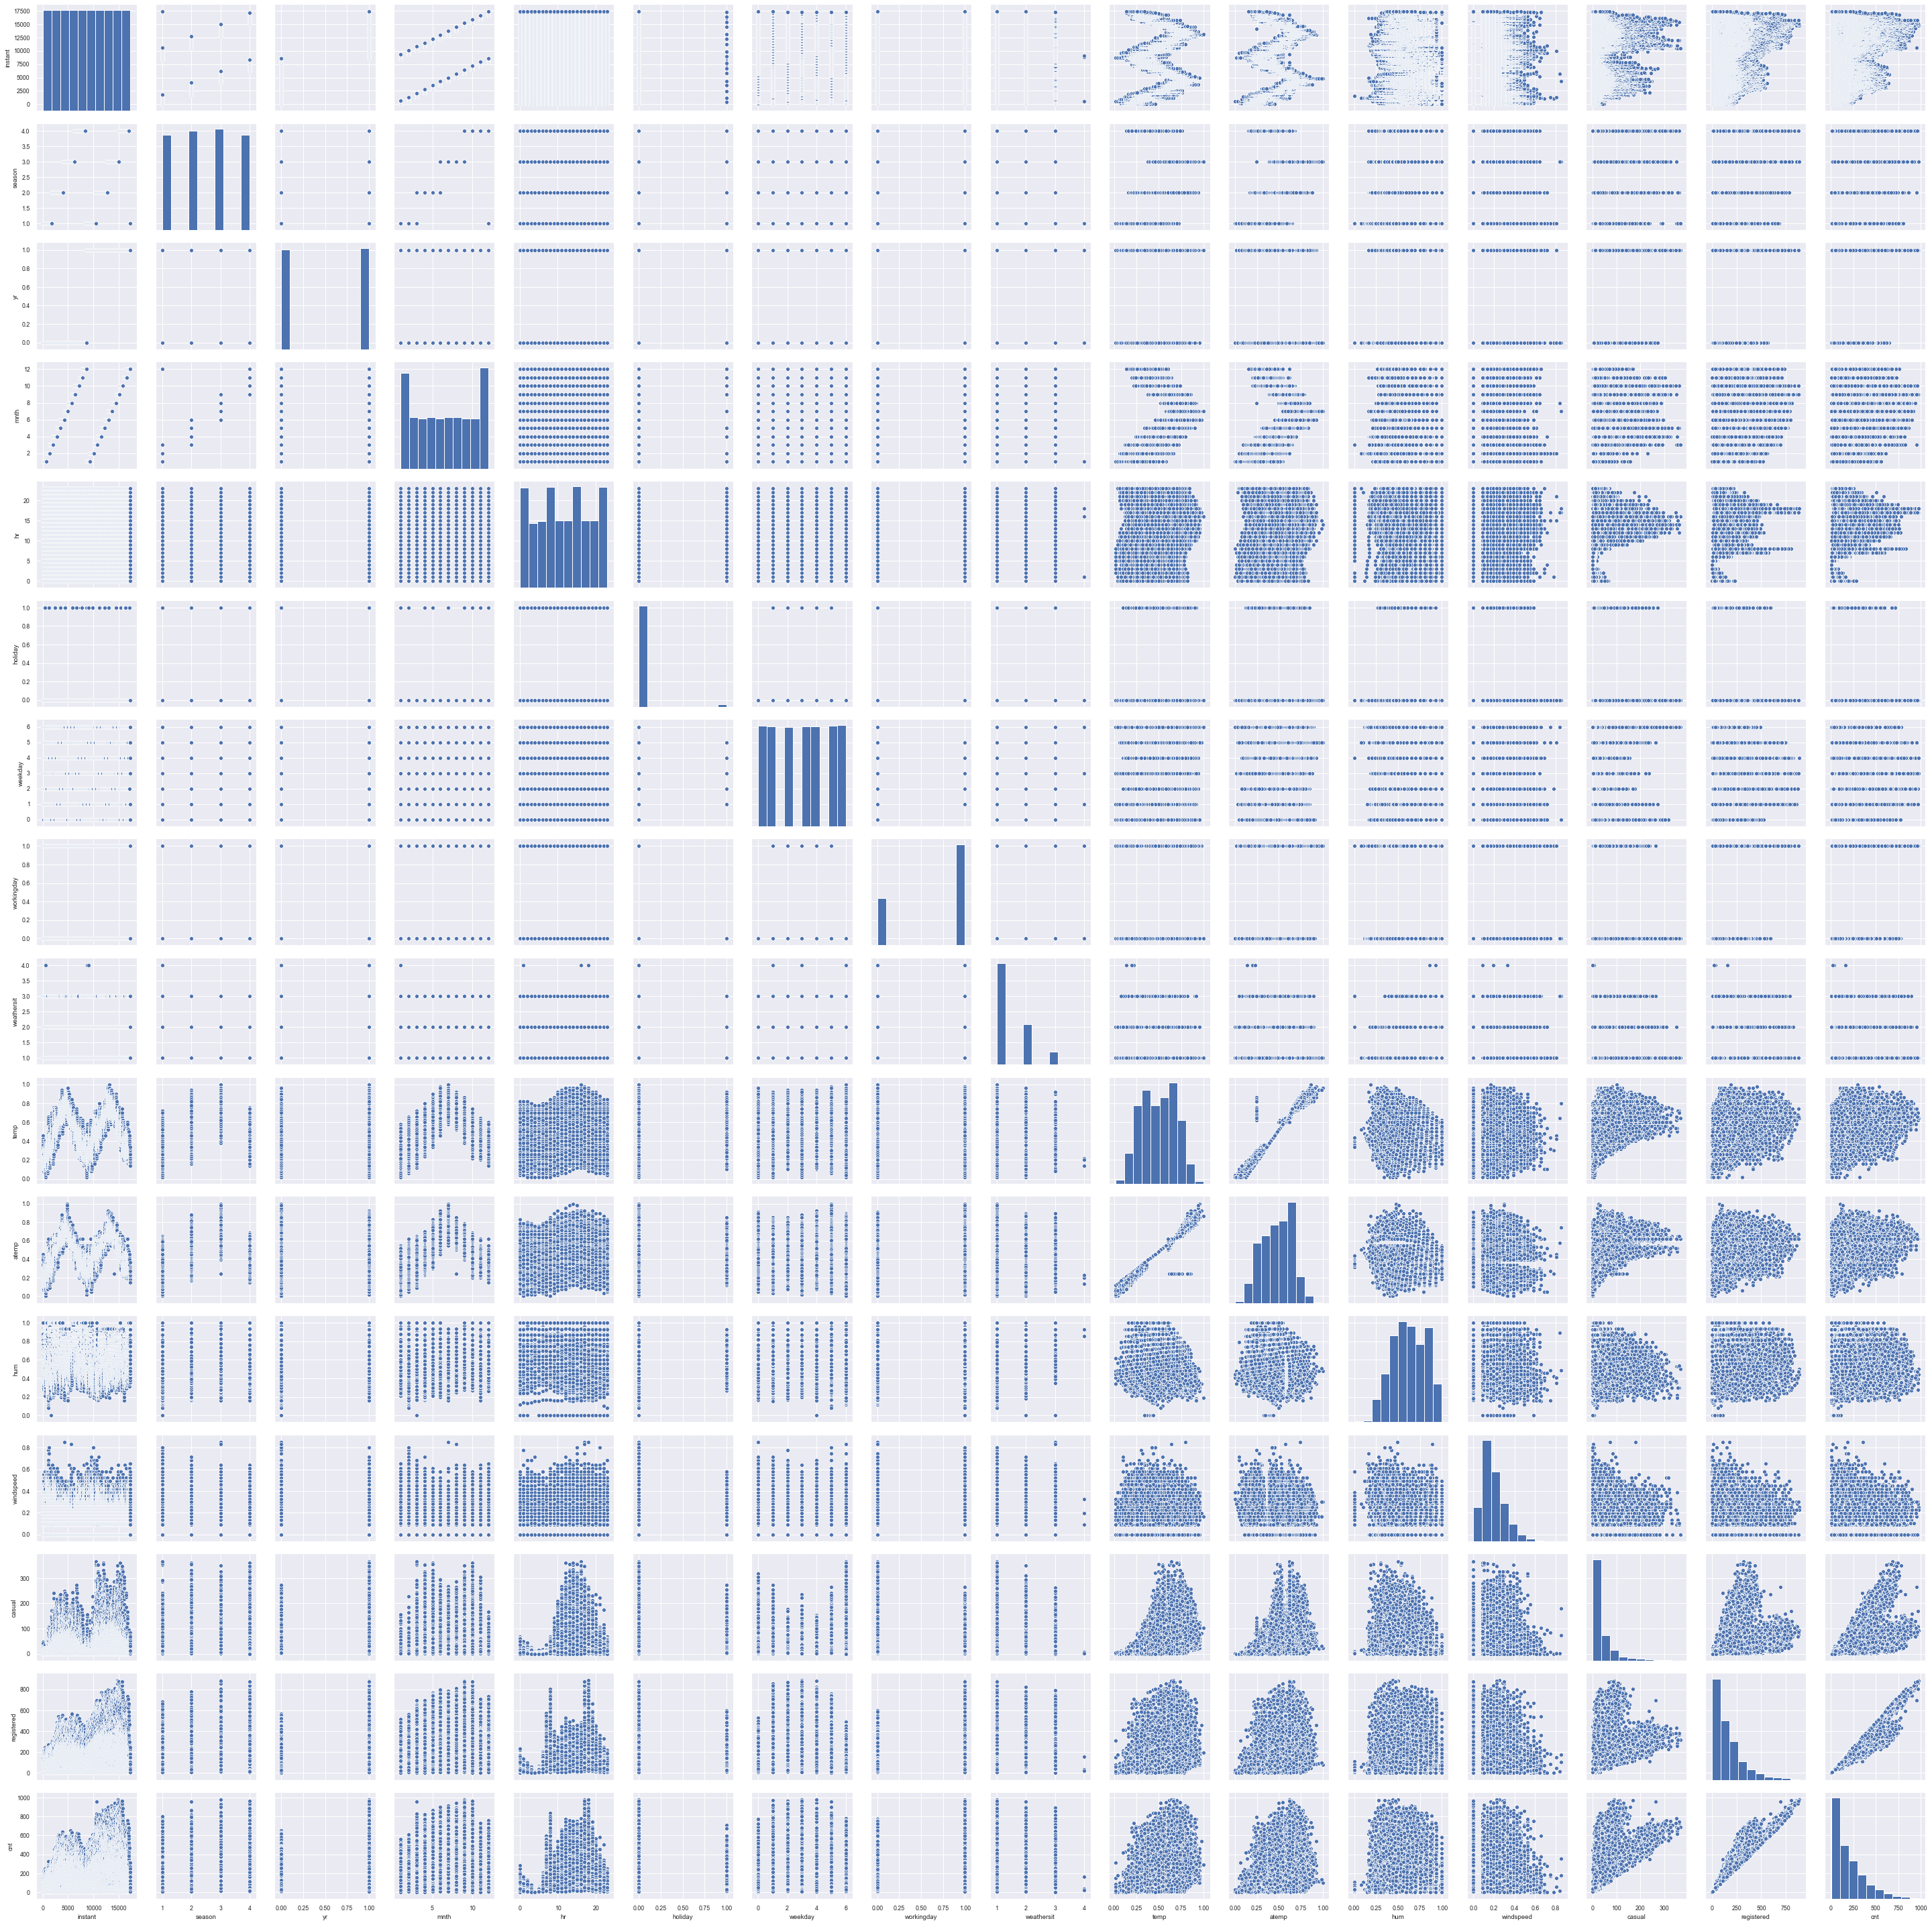

In [20]:
%config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков       
sns.pairplot(data)

По графикам мы видим, что есть некоторая зависимость между количеством клиентов (cnt) и температурой(temp), временем суток(hr), влажностью(hum).

## 2.4. Информация о целевом значении и признаках на него влияющих

Исходя из оценки взаимосвязей между переменными(п 2.3), в качестве целевой была выбрана
- 'Cnt' - количество клиентов.

Признаки для анализа следует выбирать с высоким коэфф. корреляции с целевым значением, но при этом как можно более не связанные  между собой: 
  * 'temp' - Температура
  * 'hr'-  Время суток(часы)
  * 'hum' - Влажность

Выведем коэфф. корреляции для выбранных признаков

In [260]:
features = [ u'temp', u'hr', u'hum']
target = [u'cnt']

for features_name in features:
    print ("{:<9}, {} = {:>6.3f}".format(features_name, target, corrdf[features_name][target[0]]))

temp     , ['cnt'] =  0.405
hr       , ['cnt'] =  0.394
hum      , ['cnt'] = -0.323


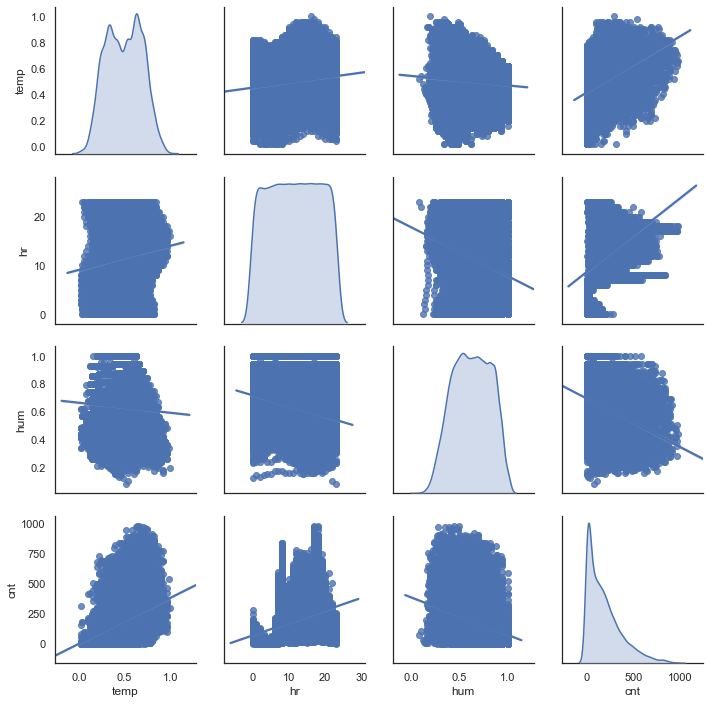

In [261]:
# График признаков попарно с разделением по типу
%config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков
sns.pairplot(data[features + target], 
            #hue = 'Type', # Признак разделения
            kind="reg", # Fit linear regression models to the scatter plots:
            diag_kind = 'kde', # Признак разделения тип графика
            ); 

## 2.5. Просмотр характеристик выбранных признаков

temp 0.02 1.0
hr 0 23
hum 0.08 1.0


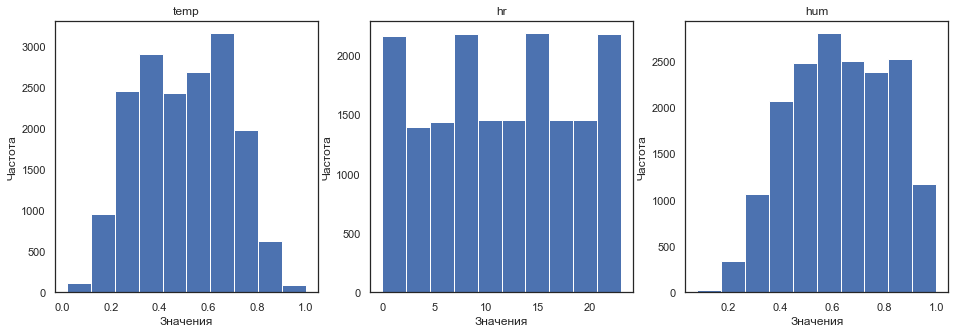

In [262]:
# Строим гистограммы по каждому признаку: 
#data[features].hist() #Упрощенный вывод графиков

plt.figure(figsize(16, 5))
plot_number = 0
for feature_name in features:
    plot_number += 1
    plt.subplot(1,3,plot_number)
    plt.hist(data[feature_name])
    
    #plt.xlim( data[feature_name].min(), data[feature_name].max() )
    
    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print (feature_name, data[feature_name].min(), data[feature_name].max())

Смещений по графикам не наблюдается. Проверим распределения исследуемых величин.

### Признак 'temp'

По графику смещений не наблюдается. Проверим минимальное значение и квартили распределения.

In [263]:
data[['temp']].describe()

temp
count 17357.000
mean      0.497
std       0.193
min       0.020
25%       0.340
50%       0.500
75%       0.660
max       1.000

По числовым характеристикам видим, что выбросов нет, распределение близко к нормальному.

<Figure size 1152x360 with 0 Axes>

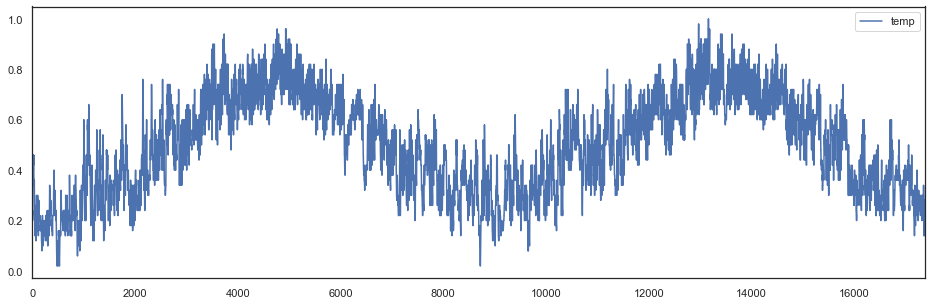

In [264]:
plt.figure(figsize(16, 5))
data[['temp']].plot(kind='line')

Построим диаграмму размаха для признака.

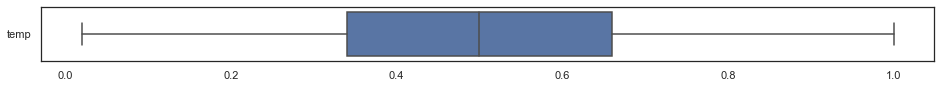

In [265]:
plt.figure(figsize(16, 1))
sns.boxplot( data=data[['temp']], orient="h")

Диаграмма размаха демонстрирует отсутствие выбросов и нормальность распределения.

### Признак 'hr'

<Figure size 1152x360 with 0 Axes>

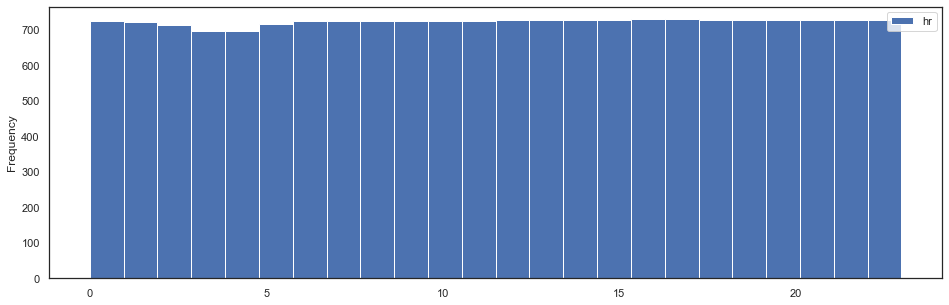

In [266]:
plt.figure(figsize(16, 5))
data[['hr']].plot(kind='hist', bins=24)

In [267]:
data[['hr']].describe()

hr
count 17357.000
mean     11.546
std       6.915
min       0.000
25%       6.000
50%      12.000
75%      18.000
max      23.000

In [268]:
data[['hr']].head()

hr
0   0
1   1
2   2
3   3
4   4

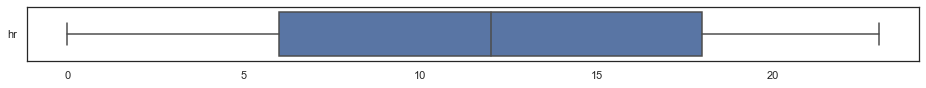

In [269]:
plt.figure(figsize(16, 1))
sns.boxplot( data=data[['hr']], orient="h")

По диаграмме размаха видно, что выбросов нет, распределение симметрично.

### Признак 'hum'

In [270]:
data[['hum']].describe()

hum
count 17357.000
mean      0.628
std       0.192
min       0.080
25%       0.480
50%       0.630
75%       0.780
max       1.000

<Figure size 1152x360 with 0 Axes>

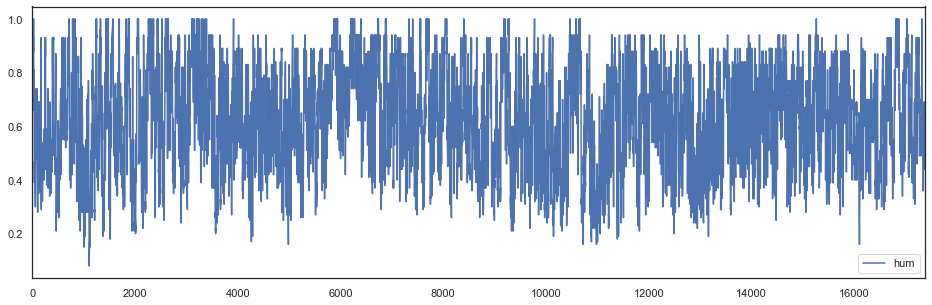

In [271]:
plt.figure(figsize(16, 5))
data[['hum']].plot(kind='line')

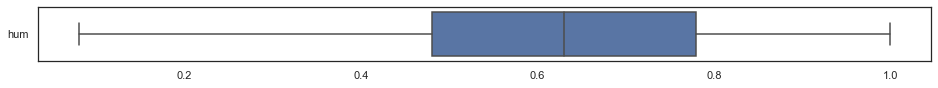

In [272]:
plt.figure(figsize(16, 1))
sns.boxplot( data=data[['hum']], orient="h")

По диаграмме размаха и числовым характеристикам видно, что распределение немного смещено вправо, есть выброс.

In [273]:
dcount = data['hum'].count() # кол-во эл. общее
dmean = data['hum'].mean() # среднее зн. общее
over_count = len( data[data['hum'] < 0.08] ) # кол-во эл. выше порогового
over_mean = data[ data['hum'] < 0.08 ]['hum'].mean()  # среднее зн. выше порогового

print ("В выборке обнаружен \"выброс\" - {} из {} значение(ий) с величиной отличающейся в {:.3f} больше чем у {:.6f} части оставшейся выборки.".format(  
    over_count,
    dcount , 
    over_mean/dmean, 
    (dcount - over_count * 1.0) / dcount ))

В выборке обнаружен "выброс" - 0 из 17357 значение(ий) с величиной отличающейся в nan больше чем у 1.000000 части оставшейся выборки.


Данные элементы будут отброшены и не будут учитываться в дальнейшем анализе.

In [4]:
# оставить строки, с значение ниже порогового
data = data[ ~ (data['hum'] < 0.08)]

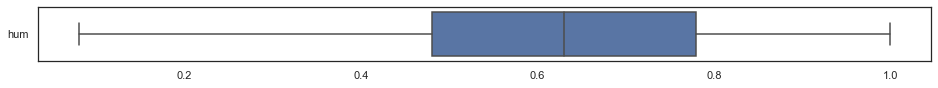

In [275]:
plt.figure(figsize(16, 1))
sns.boxplot( data=data[['hum']], orient="h")

### Построение повторных диаграмм по каждому признаку

temp 0.02 1.0
hr 0 23
hum 0.08 1.0


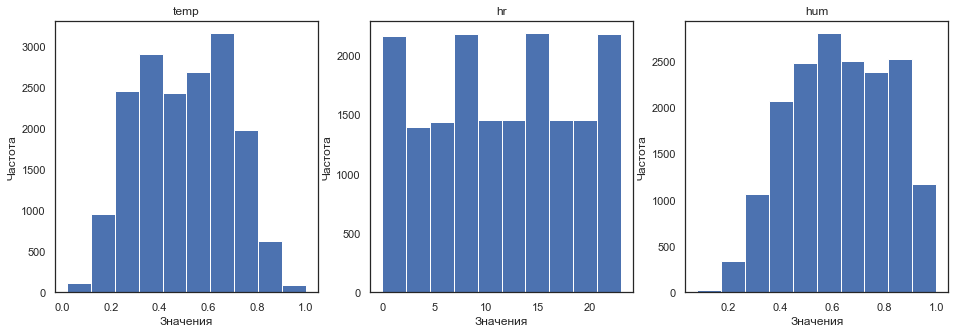

In [276]:
# Строим гистограммы по каждому признаку: 
#data[features].hist() #Упрощенный вывод графиков

plt.figure(num=1, figsize=figsize(16, 5))
plot_number = 0
for feature_name in features:
    plot_number += 1
    plt.subplot(1,3,plot_number)
    plt.hist(data[feature_name])
    #plt.xlim( data[feature_name].min(), data[feature_name].max() )
    
    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print (feature_name, data[feature_name].min(), data[feature_name].max())

### Гистограмма целевой переменной

In [277]:
data[target].describe()

cnt
count 17357.000
mean    189.667
std     181.409
min       1.000
25%      40.000
50%     142.000
75%     281.000
max     977.000

<Figure size 1152x360 with 0 Axes>

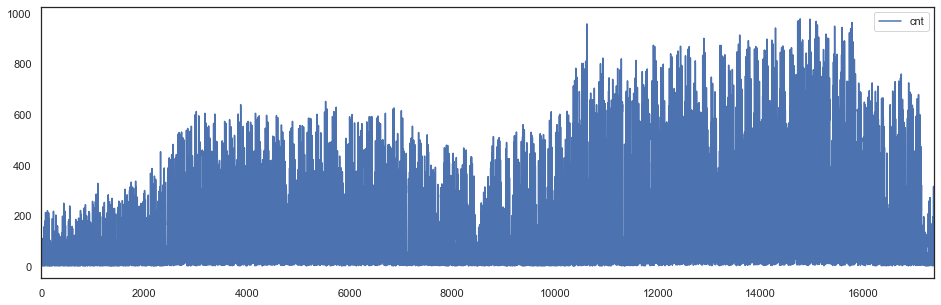

In [278]:
plt.figure(figsize(16, 5))
data[target].plot(kind='line')

Коэфф. асимметрии, эксцесса в числовом виде


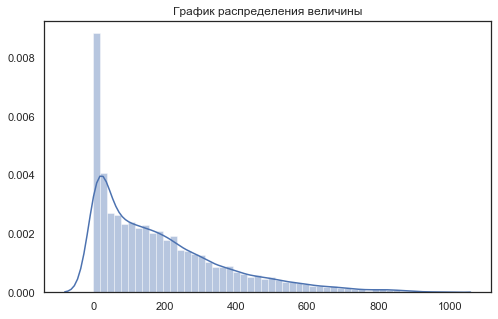

In [279]:
plt.figure(figsize=(8,5))
sns.distplot(data[target],  hist=True) # Ядерная оценка плотности (KDE - Kernel density estimation)
plt.title(u'График распределения величины')
print ("Коэфф. асимметрии, эксцесса в числовом виде")

Коэффицие́нт эксце́сса (kurtosis) — числовая характеризующая степени остроты пика распределения случайной величины.

In [280]:
stats.kurtosis(data[target], fisher = True, bias = True)

array([1.41328305])

Т. к. полученный коэффициент эксцесса больше 0, что отрицает гипотезу о нормальности рапределения.

Коэффицие́нт асимметри́и (skewness) — числовая характеризующая степени несимметричности распределения данной случайной величины.

In [281]:
stats.skew(data[target])

array([1.27603684])

Полученный коэффициент ассиметрии больше нуля. Это говорит о наличии ассиметрии в распределении, левый хвост распределения тяжелее.

# 3. Построение регрессионных моделей


## 3.1. Уравнение линейной регрессии

Разделим получившиеся данные на тренировочную (data_x_train, data_y_train) и проверочную части (x_test, y_test)

In [282]:
valid_size = 0.25 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test =  train_test_split(
    data[features], data[target], # исходные данные
    test_size = valid_size, 
    random_state=rand_seed, 
    shuffle=True # перемешивание
) 

In [283]:
print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(x_test), 
    len(x_train)+len(x_test), len(y_train)+len(x_test),
) )

Кол-во элементов: 
  x_train: 13017, y_train 13017 
  x_test:  4340, y_test  4340 
  total x: 17357, total y 17357 


Образцы тренировочных значений:

In [284]:
x_train[:4]

temp  hr   hum
6319  0.620  21 0.940
4457  0.840  15 0.340
3716  0.900  18 0.370
13276 0.720   9 0.580

In [285]:
y_train[:4]

cnt
6319   137
4457   402
3716   459
13276  327

In [286]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### 3.1.1. Одномерная модель от признака 'hr'

In [287]:
lr = linear_model.LinearRegression()

x1 = x_train['hr'].values.reshape(-1, 1)
y1 = y_train['cnt'].values.reshape(-1, 1)
x2 = x_test['hr'].values.reshape(-1, 1)
y2 = y_test['cnt'].values.reshape(-1, 1)

In [288]:
# Вычислить коэфф. на тренировочном наборе
lin_model = lr.fit(x1, y1)
# Получить предсказание на проверочном наборе
y_pred  = lin_model.predict(x2)

#### График полученной линейной зависимости y(x) = K*x + B поверх точечной диаграммы (y: 'cnt', x: hr')

<Figure size 1080x360 with 0 Axes>

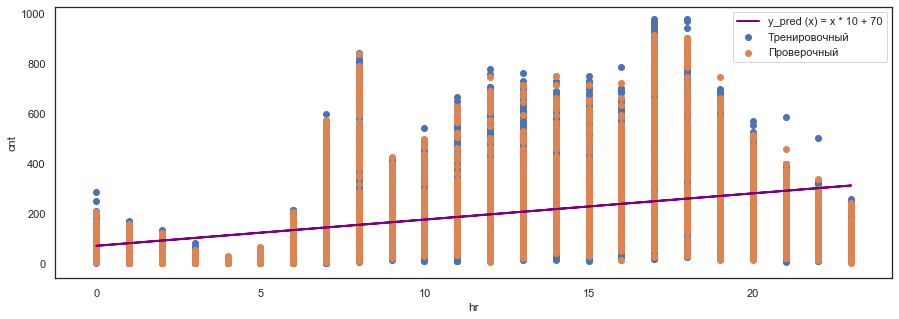

In [289]:
plt.figure(figsize(15,5))
fig, ax = plt.subplots()
ax.scatter(x1, y1, label=u'Тренировочный') 
ax.scatter(x2, y2, label=u'Проверочный') 
ax.plot( x2, y_pred, lw=2, color='purple',
        label="y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model.coef_[0][0], lin_model.intercept_[0]))
ax.legend(loc="best")
ax.set_xlabel('hr')
ax.set_ylabel(target[0])

plt.show()

#### График плотности распределения ошибок

Text(0.5, 0, 'Значение')

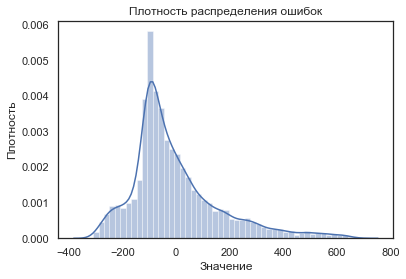

In [290]:
plt.figure(figsize=(6,4))
sns.distplot(y2 - y_pred)
plt.title(u'Плотность распределения ошибок');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

#### Оценка точности r2(MSE) для признака 'hr'

In [291]:
print ("y_pred (x) = x * {:.0f} + {:.0f}\n".format(lin_model.coef_[0][0], lin_model.intercept_[0]))

print ("MAE Mean absolute error: {:.0f}".format( mean_absolute_error(y2, y_pred)))
print ("MSE Mean squared error: {:.0f}".format( mean_squared_error(y2, y_pred)))
print ("RMSE Root Mean Squared Error: {:.0f}".format(np.sqrt( mean_squared_error(y2, y_pred) )))
print ("R2 of Linear Regression (1 is perfect): {:.3f}".format( r2_score(y2, y_pred)))

y_pred (x) = x * 10 + 70

MAE Mean absolute error: 125
MSE Mean squared error: 27804
RMSE Root Mean Squared Error: 167
R2 of Linear Regression (1 is perfect): 0.148


In [292]:
df = { u'__Проверочное':  y2.reshape(1,-1)[0],
       u'_Предсказанные': y_pred.reshape(1,-1)[0],
       u'Ошибка':  (y2 - y_pred).reshape(1,-1)[0]} 
df = pd.DataFrame(df) 
df.head()

__Проверочное  _Предсказанные   Ошибка
0             49         226.932 -177.932
1              8         111.615 -103.615
2            555         247.899  307.101
3             19         289.833 -270.833
4            167         174.515   -7.515

Text(0, 0.5, 'Предсказанное Y')

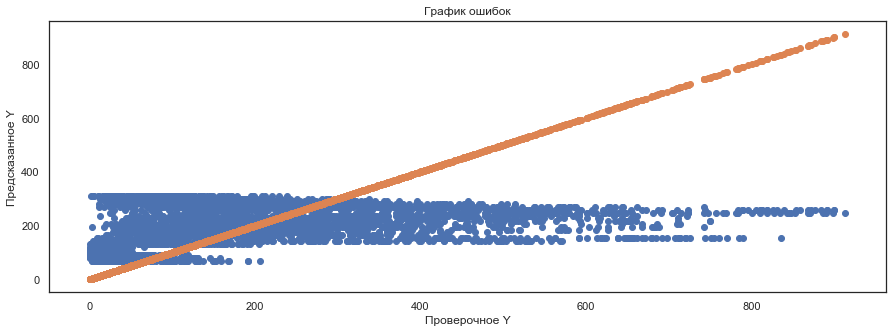

In [293]:
plt.scatter(y2,y_pred)
plt.scatter(y2,y2)
plt.title(u'График ошибок');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Предсказанное Y')

Text(0, 0.5, 'Абсолютная ошибка')

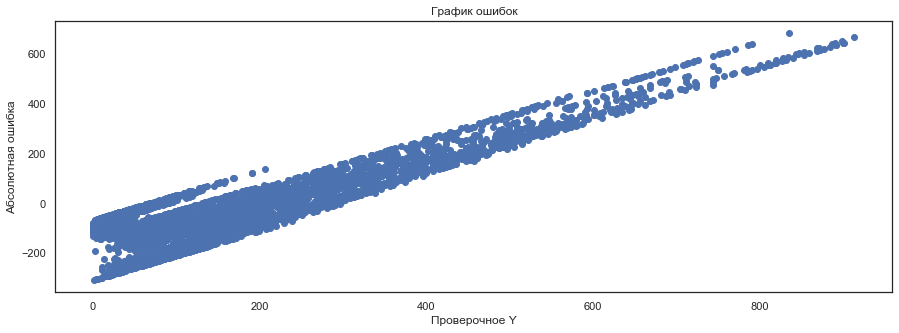

In [294]:
plt.scatter(y2,y2- y_pred)

plt.title(u'График ошибок')
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Абсолютная ошибка')

### 3.1.2. Одномерная модель от признака 'temp'

In [295]:
lr = linear_model.LinearRegression()

x1 = x_train['temp'].values.reshape(-1, 1)
y1 = y_train['cnt'].values.reshape(-1, 1)
x2 = x_test['temp'].values.reshape(-1, 1)
y2 = y_test['cnt'].values.reshape(-1, 1)

In [296]:
lin_model = lr.fit(x1, y1)
y_pred  = lin_model.predict(x2)

#### График полученной линейной зависимости y(x) = K*x + B поверх точечной диаграммы (y: 'cnt', x: temp')

<Figure size 1080x360 with 0 Axes>

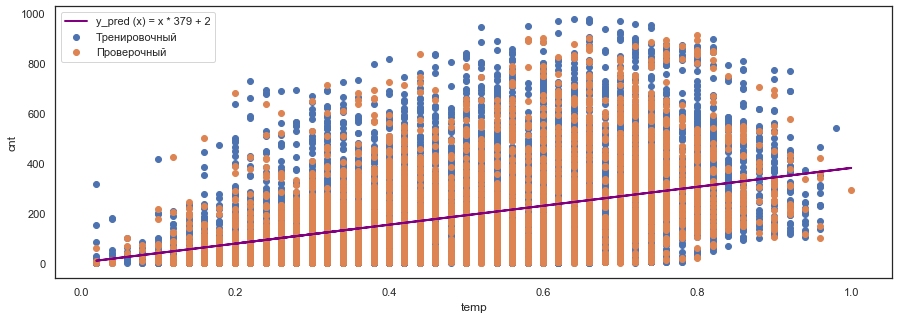

In [297]:
plt.figure(figsize(15,5))
fig, ax = plt.subplots()
ax.scatter(x1, y1, label=u'Тренировочный') # тренировочный
ax.scatter(x2, y2, label=u'Проверочный') # проверочный
ax.plot( x2, y_pred, lw=2, color='purple',
        label="y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model.coef_[0][0], lin_model.intercept_[0]))
ax.legend(loc="best")
ax.set_xlabel('temp')
ax.set_ylabel(target[0])

plt.show()

#### График плотности распределения ошибок

Text(0.5, 0, 'Значение')

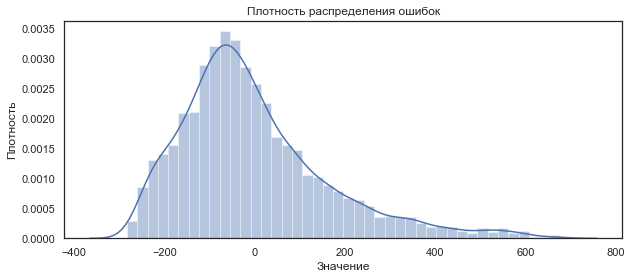

In [298]:
plt.figure(figsize=(10,4))
sns.distplot(y2 - y_pred)
plt.title(u'Плотность распределения ошибок');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

#### Оценка точности r2(MSE) для признака 'temp'

In [299]:
print ("y_pred (x) = x * {:.0f} + {:.0f}\n".format(lin_model.coef_[0][0], lin_model.intercept_[0]))

print ("MAE Mean absolute error: {:.0f}".format( mean_absolute_error(y2, y_pred)))
print ("MSE Mean squared error: {:.0f}".format( mean_squared_error(y2, y_pred)))
print ("RMSE: {:.0f}".format(np.sqrt( mean_squared_error(y2, y_pred) )))
print ("R2 of Linear Regression (1 is perfect): {:.3f}".format( r2_score(y2, y_pred)))

y_pred (x) = x * 379 + 2

MAE Mean absolute error: 125
MSE Mean squared error: 27027
RMSE: 164
R2 of Linear Regression (1 is perfect): 0.171


In [300]:
df = { u'__Проверочное':  y2.reshape(1,-1)[0],
       u'_Предсказанные': y_pred.reshape(1,-1)[0],
       u'Ошибка':  (y2 - y_pred).reshape(1,-1)[0]} 
df = pd.DataFrame(df) 
df.head()

__Проверочное  _Предсказанные   Ошибка
0             49          78.037  -29.037
1              8         131.030 -123.030
2            555         290.009  264.991
3             19         115.889  -96.889
4            167         123.459   43.541

Text(0, 0.5, 'Предсказанное Y')

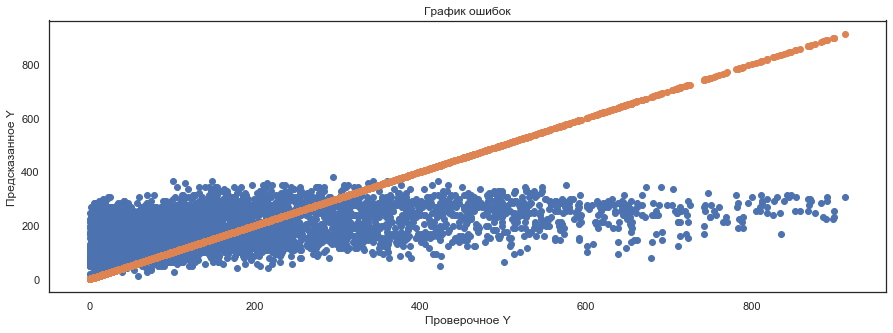

In [301]:
plt.scatter(y2,y_pred)
plt.scatter(y2,y2)
plt.title(u'График ошибок');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Предсказанное Y')

Text(0, 0.5, 'Абсолютная ошибка')

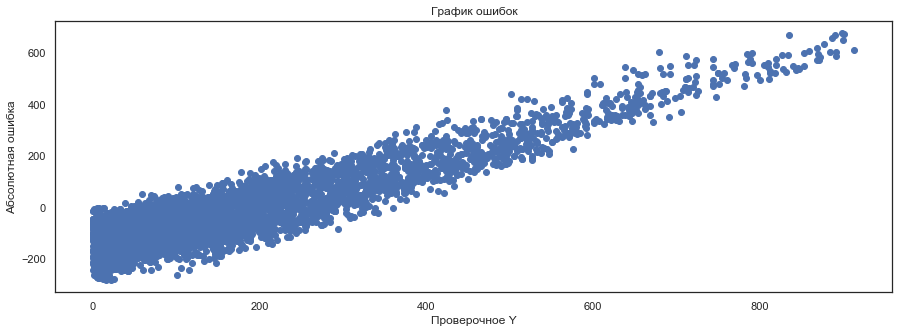

In [302]:
plt.scatter(y2,y2- y_pred)

plt.title(u'График ошибок')
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Абсолютная ошибка')

### 3.1.3. Одномерная модель от признака 'hum'

In [303]:
lr = linear_model.LinearRegression()

x1 = x_train['hum'].values.reshape(-1, 1)
y1 = y_train['cnt'].values.reshape(-1, 1)
x2 = x_test['hum'].values.reshape(-1, 1)
y2 = y_test['cnt'].values.reshape(-1, 1)

In [304]:
lin_model = lr.fit(x1, y1)
y_pred  = lin_model.predict(x2)

#### График полученной линейной зависимости y(x) = K*x + B поверх точечной диаграммы (y: 'cnt', x: hum')

<Figure size 1080x360 with 0 Axes>

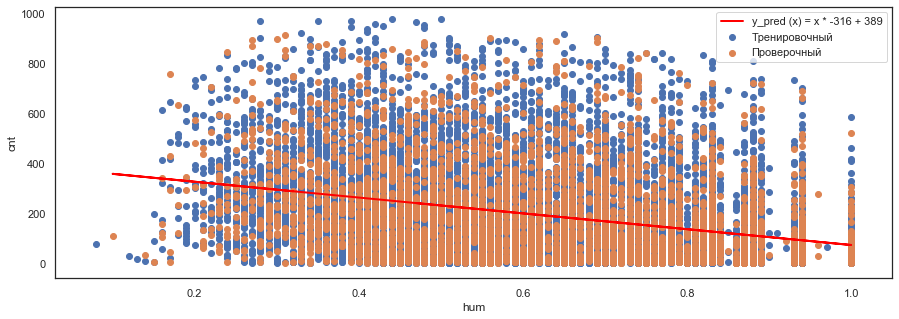

In [305]:
plt.figure(figsize(15,5))
fig, ax = plt.subplots()
ax.scatter(x1, y1, label=u'Тренировочный') # тренировочный
ax.scatter(x2, y2, label=u'Проверочный') # проверочный
ax.plot( x2, y_pred, lw=2, color='red',
        label="y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model.coef_[0][0], lin_model.intercept_[0]))
ax.legend(loc="best")
ax.set_xlabel('hum')
ax.set_ylabel(target[0])

plt.show()

#### График плотности распределения ошибок

Text(0.5, 0, 'Значение')

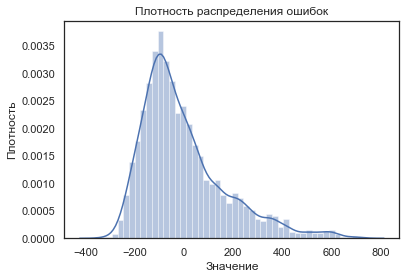

In [306]:
plt.figure(figsize=(6,4))
sns.distplot(y2 - y_pred)
plt.title(u'Плотность распределения ошибок');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

#### Оценка точности r2(MSE) для признака 'hum'

In [307]:
print ("y_pred (x) = x * {:.0f} + {:.0f}\n".format(lin_model.coef_[0][0], lin_model.intercept_[0]))

print ("MAE Mean absolute error: {:.0f}".format( mean_absolute_error(y2, y_pred)))
print ("MSE Mean squared error: {:.0f}".format( mean_squared_error(y2, y_pred)))
print ("RMSE: {:.0f}".format(np.sqrt( mean_squared_error(y2, y_pred) )))
print ("R2 of Linear Regression (1 is perfect): {:.3f}".format( r2_score(y2, y_pred)))

y_pred (x) = x * -316 + 389

MAE Mean absolute error: 132
MSE Mean squared error: 29361
RMSE: 171
R2 of Linear Regression (1 is perfect): 0.100


In [308]:
df = { u'__Проверочное':  y2.reshape(1,-1)[0],
       u'_Предсказанные': y_pred.reshape(1,-1)[0],
       u'Ошибка':  (y2 - y_pred).reshape(1,-1)[0]} 
df = pd.DataFrame(df) 
df.head()

__Проверочное  _Предсказанные   Ошибка
0             49         240.435 -191.435
1              8         113.983 -105.983
2            555         193.015  361.985
3             19         211.983 -192.983
4            167         246.757  -79.757

Text(0, 0.5, 'Предсказанное Y')

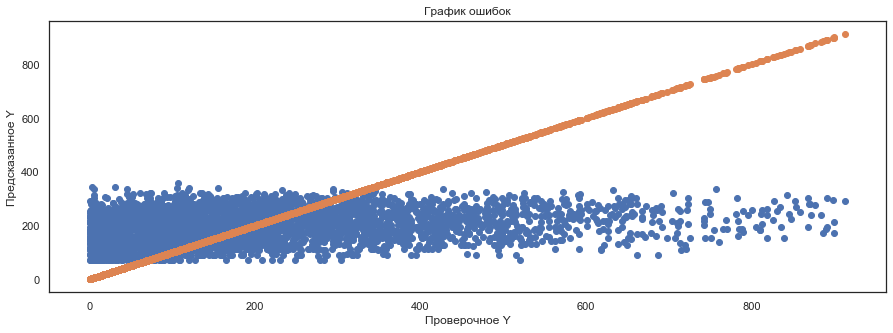

In [309]:
plt.scatter(y2,y_pred)
plt.scatter(y2,y2)
plt.title(u'График ошибок');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Предсказанное Y')

Text(0, 0.5, 'Абсолютная ошибка')

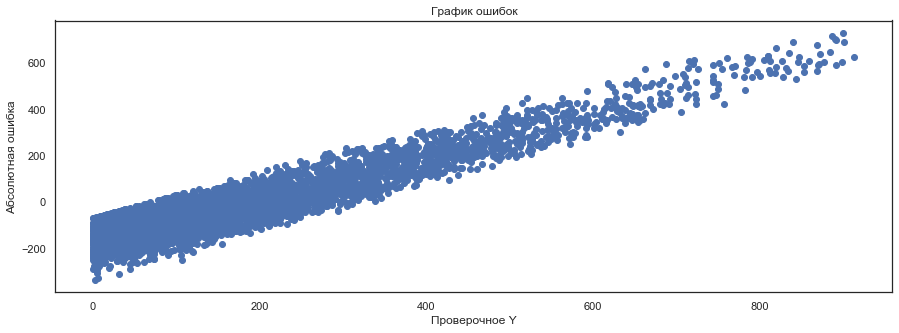

In [310]:
plt.scatter(y2,y2- y_pred)

plt.title(u'График ошибок')
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Абсолютная ошибка')

### 3.1.4. Многомерная модель

In [311]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score

bh_data = load_boston()
print(bh_data.keys())
boston = pd.DataFrame(bh_data.data, columns=bh_data.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [312]:
lin_reg_mult = LinearRegression()
lin_reg_mult.fit(x_train, y_train)
y_pred = lin_reg_mult.predict(x_test)

#### Оценка точности r2(MSE)

In [313]:
print ("y_pred (x) =\n   x1 *{} + {:.0f}\n".format(lin_reg_mult.coef_, lin_reg_mult.intercept_[0]))
print ("MAE Mean absolute error: {:.0f}".format( mean_absolute_error(y_test, y_pred)))
print ("MSE Mean squared error: {:.0f}".format( mean_squared_error(y_test, y_pred)))
print ("RMSE: {:.0f}".format(np.sqrt( mean_squared_error(y_test, y_pred) )))
print ("R2 of Linear Regresson (1 is perfect): {:.3f}".format( r2_score(y_test, y_pred)))

y_pred (x) =
   x1 *[[ 322.1853772     7.50558064 -215.34019318]] + 79

MAE Mean absolute error: 108
MSE Mean squared error: 21821
RMSE: 148
R2 of Linear Regresson (1 is perfect): 0.331


In [314]:
(y_test - y_pred).head()

cnt
268   -105.610
6494   -23.019
5083   237.256
8500  -193.482
16935    6.949

#### Точечная диаграмма 

<Figure size 1080x360 with 0 Axes>

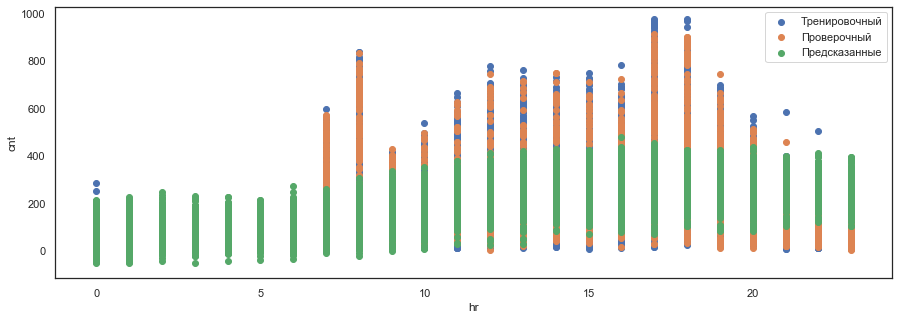

In [315]:
plt.figure(figsize(15,5))
fig, ax = plt.subplots()
ax.scatter(x_train['hr'], y_train, label=u'Тренировочный') # тренировочный
ax.scatter(x_test['hr'], y_test, label=u'Проверочный') # проверочный
ax.scatter(x_test['hr'], y_pred, label=u'Предсказанные') # проверочный

#ax.plot( x_test['hr'], y_pred, lw=2, color='red',
        #label="y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model.coef_[0][0], lin_model.intercept_[0]))

ax.legend(loc="best")
ax.set_xlabel('hr')
ax.set_ylabel(target[0])

plt.show()

<Figure size 1080x360 with 0 Axes>

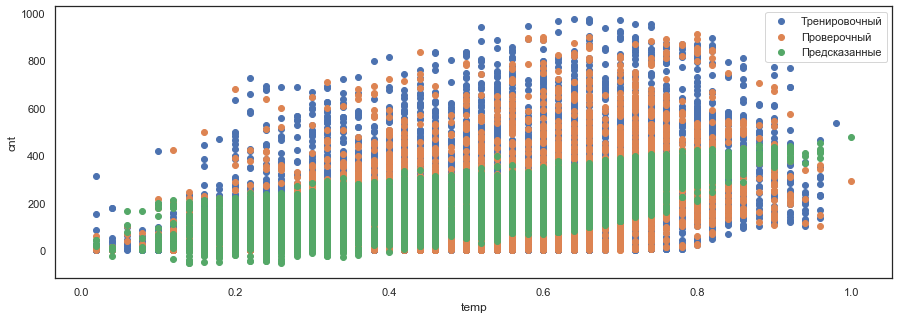

In [322]:
plt.figure(figsize(15,5))
fig, ax = plt.subplots()
ax.scatter(x_train['temp'], y_train, label=u'Тренировочный') # тренировочный
ax.scatter(x_test['temp'], y_test, label=u'Проверочный') # проверочный
ax.scatter(x_test['temp'], y_pred, label=u'Предсказанные') # проверочный

#ax.plot( x_test['temp'], y_pred, lw=2, color='red',
        #label="y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model.coef_[0][0], lin_model.intercept_[0]))

ax.legend(loc="best")
ax.set_xlabel('temp')
ax.set_ylabel(target[0])

plt.show()

<Figure size 1080x360 with 0 Axes>

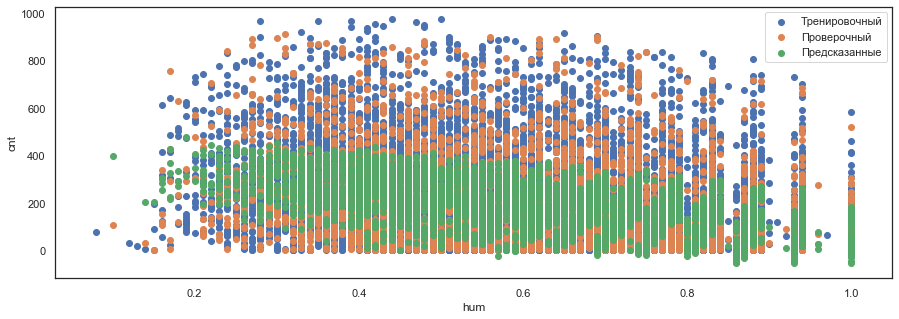

In [317]:
plt.figure(figsize(15,5))
fig, ax = plt.subplots()
ax.scatter(x_train['hum'], y_train, label=u'Тренировочный') # тренировочный
ax.scatter(x_test['hum'], y_test, label=u'Проверочный') # проверочный
ax.scatter(x_test['hum'], y_pred, label=u'Предсказанные') # проверочный

#ax.plot( x_test['hum'], y_pred, lw=2, color='red',
        #label="y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model.coef_[0][0], lin_model.intercept_[0]))

ax.legend(loc="best")
ax.set_xlabel('hum')
ax.set_ylabel(target[0])

plt.show()

#### График плотности распределения ошибок

Text(0.5, 0, 'Значение')

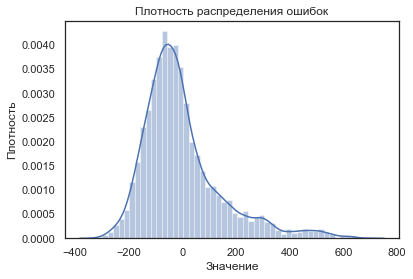

In [323]:
plt.figure(figsize=(6,4))
mistakes = y_test - y_pred
sns.distplot(mistakes)
plt.title(u'Плотность распределения ошибок');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

In [324]:
mistakes.describe()

cnt
count 4340.000
mean    -2.871
std    147.708
min   -317.925
25%    -96.837
50%    -34.435
75%     48.586
max    687.905

In [1]:
stats.kurtosis(mistakes, fisher = True, bias = True)

NameError: name 'stats' is not defined

График плотности распределения ошибок ассиметричен, пиковое значение смещенно влево от нуля, что говорит нам о невысоком качестве модели.

Text(0, 0.5, 'Предсказанное Y')

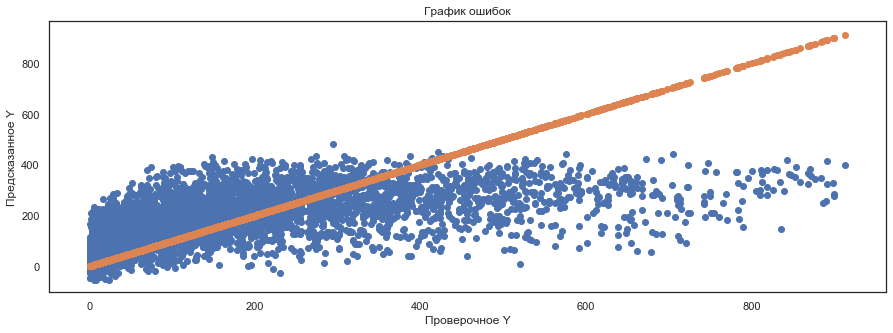

In [319]:
plt.scatter(y_test,y_pred)
plt.scatter(y_test,y_test)
plt.title(u'График ошибок');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Предсказанное Y')

Text(0, 0.5, 'Абсолютная ошибка')

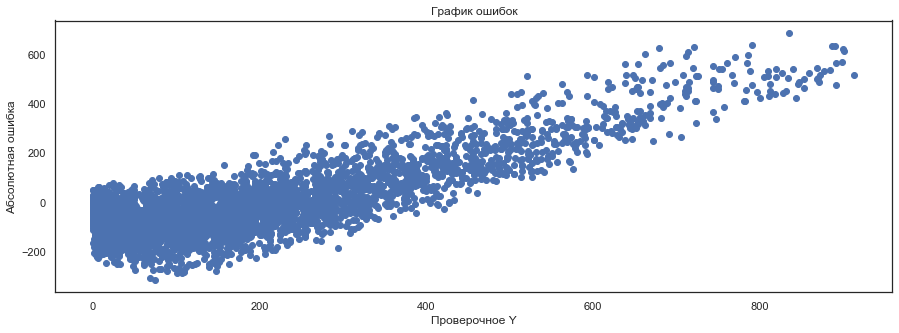

In [320]:
plt.scatter(y_test, (y_test - y_pred) )

plt.title(u'График ошибок')
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Абсолютная ошибка')

In [321]:
import statsmodels.api as sm
sm_x_train = sm.add_constant(x_train) # adding a constant
model = sm.OLS(y_train, sm_x_train)  # OLS - Ordinary Least Squares
results = model.fit() 

print('Parameters: {:.0f}', results.params)
print('R2: ', results.rsquared)
print(results.summary())

Parameters: {:.0f} const     78.799
temp     322.185
hr         7.506
hum     -215.340
dtype: float64
R2:  0.3255953157688828
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     2094.
Date:                Fri, 20 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:31:09   Log-Likelihood:                -83623.
No. Observations:               13017   AIC:                         1.673e+05
Df Residuals:                   13013   BIC:                         1.673e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

C:\Users\User\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 4. Выводы по результатам сравнительного анализа полученных регрессионных моделей

1. Для линейной регрессии, где целевая переменная - количество клиентов (cnt), признак - время суток (hr), коэффициент детерминации составил 0.148, что говорит о низкой точности предсказанных данных этой моделью.
    Средний модуль отклонения составил 125, средний квадрат отклонения - 27804, корень из среднего квадрата отклонения - 167.

2. Для линейной регрессии, где целевая переменная - количество клиентов (cnt), признак - температура (temp), коэффициент детерминации составил 0.171, что говорит о низкой точности предсказанных данных этой моделью.
    Средний модуль отклонения составил 125, средний квадрат отклонения - 27027, корень из среднего квадрата отклонения - 164.

3. Для линейной регрессии, где целевая переменная - количество клиентов (cnt), признак - влажность (hum), коэффициент детерминации составил 0.1, что говорит о низкой точности предсказанных данных этой моделью.
    Средний модуль отклонения составил 132, средний квадрат отклонения - 29361, корень из среднего квадрата отклонения - 171.
    
4. Для множественной регрессии, где целевая переменная - количество клиентов (cnt), признаки - влажность (hum), температура (temp), время суток (hr) коэффициент детерминации составил 0.326, что говорит о невысокой точности предсказанных данных этой моделью.

In [5]:
data.to_csv("bike-sharing-dataset-clean.csv")